# Visualize Qm9 NMR Result

In [4]:
%load_ext lab_black

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics

In [6]:
# making folder for saving figures
os.makedirs("fig", exist_ok=True)

C : MAE(ppm) = 2.2752235082644625


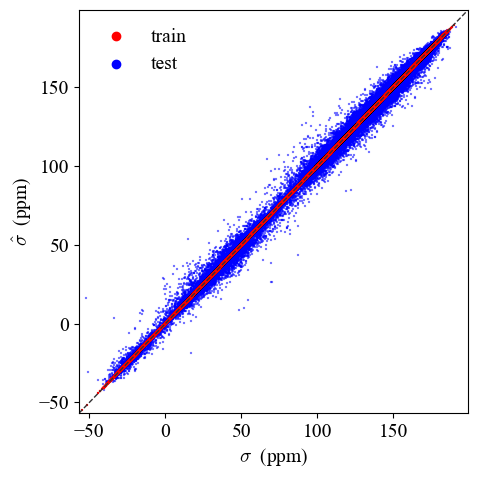

In [7]:
# H, C, N, O, F
element = "C"

train_result_csv_path = (
    f"/workspace/result/NMR/{element}/{element}_prediction_train_result_qm9.csv"
)
test_result_csv_path = (
    f"/workspace/result/NMR/{element}/{element}_prediction_test_result_qm9.csv"
)

# train_result_csv_path = f"/workspace/result/NMR/{element}/{element}_prediction_train_result_qm9.csv"
# test_result_csv_path = f"/workspace/result/NMR/{element}/{element}_prediction_test_result_test_40drugs.csv"

# reading train and test results
df_train_element = pd.read_csv(train_result_csv_path)
df_test_element = pd.read_csv(test_result_csv_path)

y_predict_test = df_test_element["nmr_shift_prediction"]
y_actual_test = df_test_element["nmr_shift"]
y_predict_train = df_train_element["nmr_shift_prediction"]
y_actual_train = df_train_element["nmr_shift"]

plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

range_min = y_actual_test.min() - 5
range_max = y_actual_test.max() + 8

ms = 2
alpha = 0.5
x = np.arange(range_min - 20, range_max + 20, 0.001)
y = x
plt.plot(x, y, c="#333132", ls="dashed", lw=1)

# calc mae (ppm)
mae_score = statistics.mean(
    list(abs(df_test_element["nmr_shift"] - df_test_element["nmr_shift_prediction"]))
)
print(f"{element} : MAE(ppm) = {mae_score}")

# print(f"{element} : MAE(ppm) = { mean_absolute_error(df_test_element['nmr_shift'], df_test_element['nmr_shift_prediction']) }")

plt.scatter(
    y_actual_test,
    y_predict_test,
    marker="s",
    linewidths=0.1,
    s=ms,
    alpha=alpha,
    color="blue",
)
plt.scatter(
    y_actual_train,
    y_predict_train,
    marker="s",
    linewidths=0.1,
    s=ms,
    alpha=1,
    color="red",
)

plt.xlim(range_min, range_max)
plt.ylim(range_min, range_max)

# For legend
plt.scatter(999, 999, c="red", label="train")
plt.scatter(999, 999, c="blue", label="test")

plt.ylabel("$\hat{\sigma}\;$ (ppm)")
plt.grid(False)
plt.xlabel("$\sigma\;$ (ppm)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(f"./fig/{element}_train_test_result", dpi=300)